<a href="https://colab.research.google.com/github/Rustydinoco/ML_Learning/blob/master/Sosial_Media_Anylize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score


In [ ]:
df = pd.read_csv("Social_Media.csv")
df

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.41,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,NaN,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2008,F,16.329,21,0,0,0,0,0,0,...,0,0,0,2,0,0,0,1,0,0
14996,2008,F,16.545,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14997,2007,F,17.999,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14998,2007,F,17.903,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gradyear         15000 non-null  int64 
 1   gender           13663 non-null  object
 2   age              12504 non-null  object
 3   NumberOffriends  15000 non-null  int64 
 4   basketball       15000 non-null  int64 
 5   football         15000 non-null  int64 
 6   soccer           15000 non-null  int64 
 7   softball         15000 non-null  int64 
 8   volleyball       15000 non-null  int64 
 9   swimming         15000 non-null  int64 
 10  cheerleading     15000 non-null  int64 
 11  baseball         15000 non-null  int64 
 12  tennis           15000 non-null  int64 
 13  sports           15000 non-null  int64 
 14  cute             15000 non-null  int64 
 15  sex              15000 non-null  int64 
 16  sexy             15000 non-null  int64 
 17  hot              15000 non-null

In [ ]:
df.describe()

,gradyear,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,2007.496933,29.834533,0.267000,0.255467,0.22200,0.159667,0.142933,0.135000,0.105133,0.104133,...,0.112867,0.259467,0.357267,0.150267,0.071800,0.051467,0.185867,0.118067,0.091733,0.061067
std,1.116516,35.386649,0.788851,0.702260,0.92042,0.737344,0.638747,0.548691,0.502491,0.519205,...,2.708619,0.704398,0.728512,0.478716,0.356258,0.280755,0.609928,0.455200,0.420631,0.349112
min,2006.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.000000,20.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.000000,44.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,605.000000,22.000000,9.000000,22.00000,17.000000,14.000000,31.000000,8.000000,14.000000,...,327.000000,12.000000,11.000000,8.000000,8.000000,8.000000,16.000000,14.000000,8.000000,16.000000


In [ ]:
df.isnull().sum()

,0
gradyear,0
gender,1337
age,2496
NumberOffriends,0
basketball,0
football,0
soccer,0
softball,0
volleyball,0
swimming,0


In [ ]:
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
df['age'] = df['age'].fillna(df['age'].mode()[0])
df

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,F,16. Jun,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.41,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,16. Jun,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2008,F,16.329,21,0,0,0,0,0,0,...,0,0,0,2,0,0,0,1,0,0
14996,2008,F,16.545,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14997,2007,F,17.999,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14998,2007,F,17.903,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.head(30)

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,F,16. Jun,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.41,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,16. Jun,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0
5,2008,M,18.034,32,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2006,M,18.53,18,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,2006,F,16. Jun,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2006,F,19.168,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,2007,F,16. Jun,21,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [ ]:
df['age'] = df['age'].str.rstrip('. Jun')

df


,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,F,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.41,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,16,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2008,F,16.329,21,0,0,0,0,0,0,...,0,0,0,2,0,0,0,1,0,0
14996,2008,F,16.545,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14997,2007,F,17.999,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14998,2007,F,17.903,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,F,16.000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.410,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,16.000,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2008,F,16.329,21,0,0,0,0,0,0,...,0,0,0,2,0,0,0,1,0,0
14996,2008,F,16.545,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14997,2007,F,17.999,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14998,2007,F,17.903,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df['age'].isnull().sum()

233

In [ ]:
df['age'] = df['age'].fillna(df['age'].mode()[0])
df

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,F,16.000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.410,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,16.000,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2008,F,16.329,21,0,0,0,0,0,0,...,0,0,0,2,0,0,0,1,0,0
14996,2008,F,16.545,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14997,2007,F,17.999,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14998,2007,F,17.903,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df['age'].isnull().sum()

0

In [ ]:
df['gender'].replace({'F': 0, 'M': 1}, inplace=True)
df


<ipython-input-66-1b8876b88c66>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({'F': 0, 'M': 1}, inplace=True)
<ipython-input-66-1b8876b88c66>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'].replace({'F': 0, 'M': 1}, inplace=True)


,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,0,16.000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,0,17.410,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,0,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,0,16.000,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,0,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2008,0,16.329,21,0,0,0,0,0,0,...,0,0,0,2,0,0,0,1,0,0
14996,2008,0,16.545,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14997,2007,0,17.999,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14998,2007,0,17.903,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df['gender'].isnull().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gradyear         15000 non-null  int64  
 1   gender           15000 non-null  int64  
 2   age              15000 non-null  float64
 3   NumberOffriends  15000 non-null  int64  
 4   basketball       15000 non-null  int64  
 5   football         15000 non-null  int64  
 6   soccer           15000 non-null  int64  
 7   softball         15000 non-null  int64  
 8   volleyball       15000 non-null  int64  
 9   swimming         15000 non-null  int64  
 10  cheerleading     15000 non-null  int64  
 11  baseball         15000 non-null  int64  
 12  tennis           15000 non-null  int64  
 13  sports           15000 non-null  int64  
 14  cute             15000 non-null  int64  
 15  sex              15000 non-null  int64  
 16  sexy             15000 non-null  int64  
 17  hot         

In [ ]:
MinMaxScaler = MinMaxScaler()
df_scaled = MinMaxScaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled.head(30)

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0.333333,0.0,0.113927,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.0000,0.000000,0.000,0.0000
1,0.333333,0.0,0.127668,0.080992,0.000000,0.000000,0.045455,0.000000,0.000000,0.032258,...,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.0000,0.000000,0.125,0.0000
2,0.333333,0.0,0.128652,0.067769,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.083333,0.000000,0.000,0.000,0.000,0.0000,0.000000,0.125,0.0625
3,0.000000,0.0,0.113927,0.059504,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.0000,0.000000,0.000,0.0000
4,0.666667,0.0,0.120330,0.001653,0.000000,0.000000,0.000000,0.000000,0.000000,0.032258,...,0.000000,0.000000,0.000000,0.375,0.000,0.000,0.0000,0.000000,0.000,0.0000
5,0.666667,1.0,0.133748,0.052893,0.000000,0.555556,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.0000,0.000000,0.000,0.0000
6,0.000000,1.0,0.138582,0.029752,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.125,0.000,0.000,0.0000,0.000000,0.000,0.0000
7,0.000000,0.0,0.113927,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.0000,0.000000,0.000,0.0000
8,0.000000,0.0,0.144799,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032258,...,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.0000,0.000000,0.000,0.0000
9,0.333333,0.0,0.113927,0.034711,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.090909,0.125,0.000,0.000,0.0000,0.000000,0.000,0.0000


In [ ]:
for k  in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    print(f"Jumlah k : {k}, Silhouette score :{score} ")

Jumlah k : 2, Silhouette score :0.3283065092468052 
Jumlah k : 3, Silhouette score :0.45122755183586744 
Jumlah k : 4, Silhouette score :0.3451374327459789 
Jumlah k : 5, Silhouette score :0.3277963492063644 
Jumlah k : 6, Silhouette score :0.32559345481130736 
Jumlah k : 7, Silhouette score :0.32600067383260284 
Jumlah k : 8, Silhouette score :0.3506477248236864 
Jumlah k : 9, Silhouette score :0.3298678260355858 
Jumlah k : 10, Silhouette score :0.3141905091810306 


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_scaled)
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 3], dtype=int32)

In [ ]:
df['gender'].replace({0: 'F', 1: 'M'}, inplace=True)
df['cluster'] = kmeans.labels_
df

<ipython-input-72-3c771111f388>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({0: 'F', 1: 'M'}, inplace=True)


,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
0,2007,F,16.000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2007,F,17.410,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,2007,F,17.511,41,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,1
3,2006,F,16.000,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,3,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2008,F,16.329,21,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,0,0
14996,2008,F,16.545,50,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
14997,2007,F,17.999,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14998,2007,F,17.903,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.cluster.value_counts()

,count
cluster,
1,6048
0,3189
3,3157
2,2606


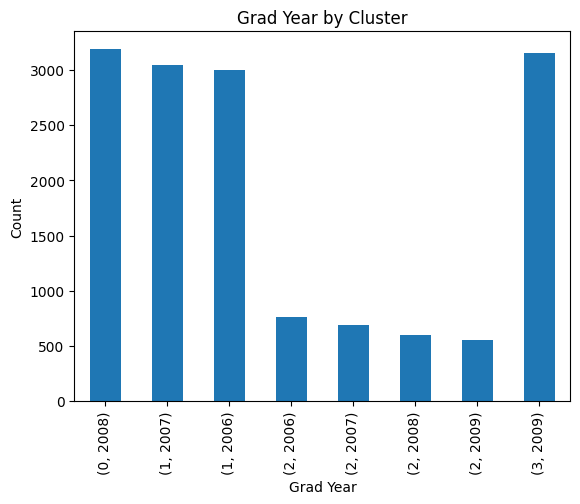

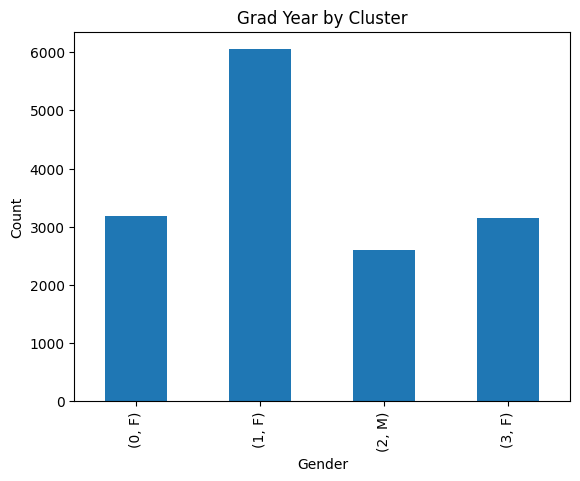

In [ ]:
grad_year_count_by_cluster = df.groupby('cluster')['gradyear'].value_counts()
grad_year_count_by_cluster.plot(kind='bar')
plt.xlabel('Grad Year')
plt.ylabel('Count')
plt.title("Grad Year by Cluster")
plt.show()

gender_count_by_cluster = df.groupby('cluster')['gender'].value_counts()
gender_count_by_cluster.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title("Grad Year by Cluster")
plt.show()

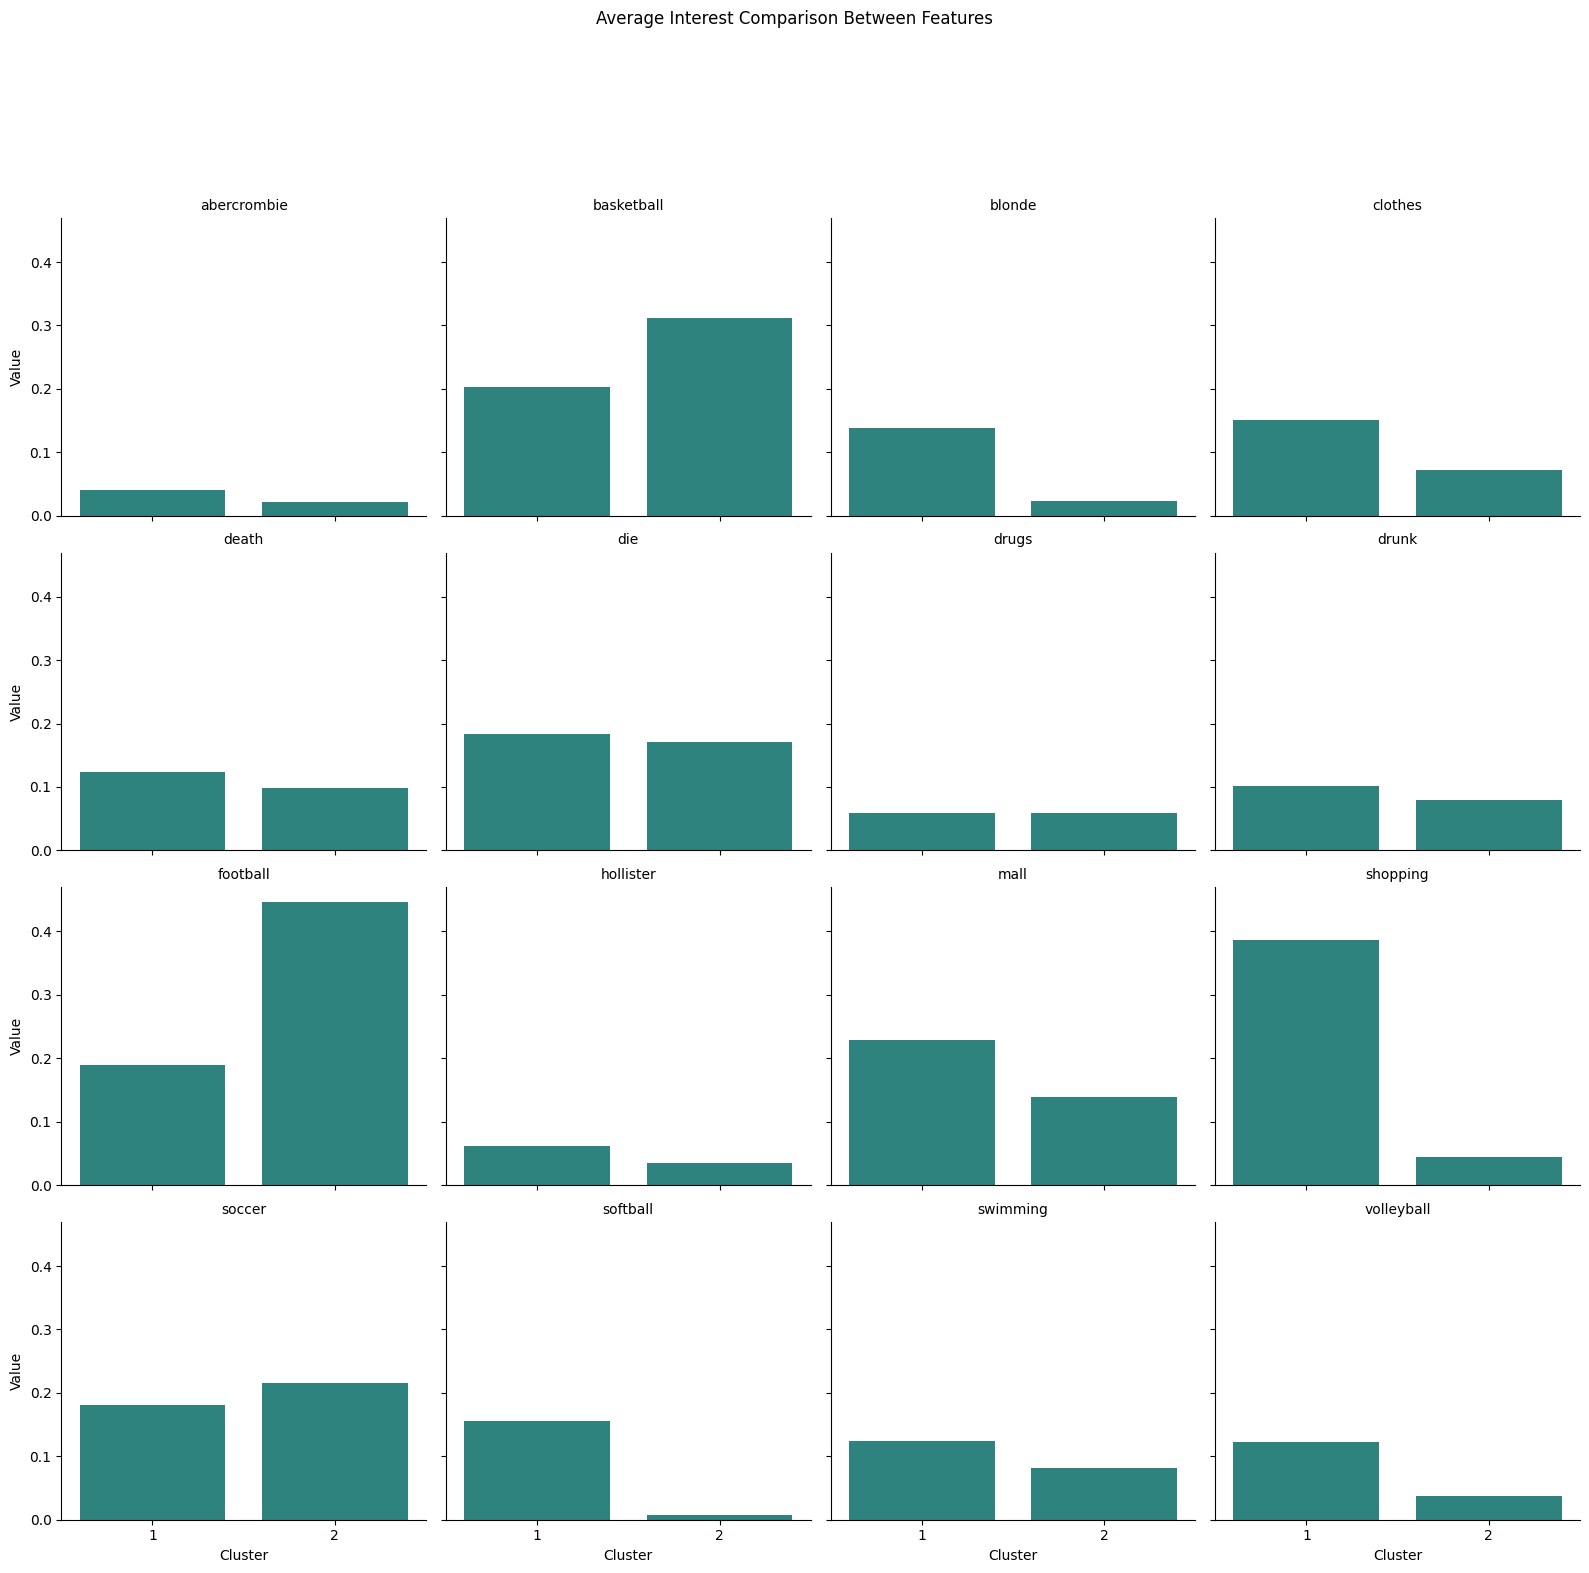

In [ ]:

feat_var = ['basketball','football','soccer','softball','volleyball','swimming','blonde','mall','shopping','clothes','hollister','abercrombie','die','death','drunk','drugs']
df_chart = df.melt (id_vars=['cluster'], value_vars= feat_var, var_name= 'variable', value_name= 'value')
df_chart = df_chart.groupby(['cluster','variable'])['value'].mean().reset_index()

df_filtered =  df_chart[df_chart['cluster'].isin([1, 2])]

g = sns.FacetGrid(df_filtered, col= 'variable', col_wrap= 4, height= 4, sharey= True)

g.map_dataframe(sns.barplot, x = 'cluster', y = 'value', hue = 'variable', palette='viridis', dodge= False)

g.set_axis_labels('Cluster', 'Value')
g.set_titles(col_template= '{col_name}')
plt.subplots_adjust(top= 0.85)
g.fig.suptitle("Average Interest Comparison Between Features")

plt.show()






1.   Cluster 0  = Female (2008)
2.   Cluster 1  = Female (2007, 2006)
3.   Cluster 2  = Male (2006, 2007, 2008, 2009)
4.   Cluster 3  = Female (2009)




